In [106]:
import os
import json
import pickle
import numpy as np
import pandas as pd

In [107]:
subject_id = 'c1s01'

data_dir = '../data'
subject_dir = os.path.join(data_dir, subject_id)

In [108]:
with open(os.path.join(subject_dir, 'ecg.pkl'), 'rb') as f:
    ecg_df = pickle.load(f)
print(ecg_df.head())

                                                   ecg  \
249  [-28.111897868142385, -27.95647339073636, -28....   
250  [-15.968960382974842, -15.694460504804901, -15...   
251  [-32.477747746622505, -31.96986620528872, -31....   
252  [-12.084838490199743, -12.354967911601, -12.42...   
253  [-22.939241079089637, -22.554159465381915, -22...   

                    start_t                   end_t  glucose  CGM_idx  \
249 2022-06-08 16:22:56.865 2022-06-08 16:22:59.865     65.0  19168.0   
250 2022-06-08 16:22:57.597 2022-06-08 16:23:00.597     65.0  19168.0   
251 2022-06-08 16:22:58.321 2022-06-08 16:23:01.321     65.0  19168.0   
252 2022-06-08 16:22:59.017 2022-06-08 16:23:02.017     65.0  19168.0   
253 2022-06-08 16:22:59.701 2022-06-08 16:23:02.701     65.0  19168.0   

              Timestamp  HRConfidence  ECGNoise  
249 2022-06-08 16:23:47         100.0  0.000140  
250 2022-06-08 16:23:47         100.0  0.000133  
251 2022-06-08 16:23:47         100.0  0.000133  
252 2022-06-

In [109]:
with open(os.path.join(subject_dir, 'ppg.pkl'), 'rb') as f:
    ppg_df = pickle.load(f)
print(ppg_df.head())

                                                 ppg  \
0  [-55.43846741186884, -56.629477865082336, -61....   
1  [-148.88680437539873, -146.558745521679, -139....   
2  [-1.5364728751966137, 0.240169667747975, 2.519...   
0  [-2.19015319728266, -2.567801574405306, -2.424...   
1  [-21.495209432337816, -20.663056632781533, -20...   

                     start_t                      end_t  glucose  CGM_idx  \
0 2022-06-08 13:32:45.453125 2022-06-08 13:33:15.453125    132.0  19134.0   
1 2022-06-08 13:33:00.453125 2022-06-08 13:33:30.453125    132.0  19134.0   
2 2022-06-08 13:33:15.453125 2022-06-08 13:33:45.453125    132.0  19134.0   
0 2022-06-08 13:33:48.015625 2022-06-08 13:34:18.015625    130.0  19135.0   
1 2022-06-08 13:34:03.015625 2022-06-08 13:34:33.015625    130.0  19135.0   

            Timestamp  
0 2022-06-08 13:33:48  
1 2022-06-08 13:33:48  
2 2022-06-08 13:33:48  
0 2022-06-08 13:38:47  
1 2022-06-08 13:38:47  


In [110]:
with open(os.path.join(subject_dir, 'eda.pkl'), 'rb') as f:
    eda_df = pickle.load(f)
print(eda_df.head())
print(eda_df['tonic'])

                                              phasic  \
0  [3.47894178772401e-05, 3.478941787726786e-05, ...   
0  [0.0003386681953237991, 0.000298773554042564, ...   
0  [0.005125999999999964, 0.002562999999999954, 0...   
0  [0.12683561362862078, 0.12683561362862078, 0.1...   
0  [0.17215209362386466, 0.17215209362386466, 0.1...   

                                               tonic                 start_t  \
0  [0.22963971858212276, 0.22963971858212273, 0.2... 2022-06-08 13:28:48.250   
0  [0.25167499306593744, 0.25171488770721867, 0.2... 2022-06-08 13:33:47.250   
0  [0.22680900000000004, 0.22680900000000004, 0.2... 2022-06-08 13:38:48.250   
0  [0.2037673863713792, 0.2037673863713792, 0.203... 2022-06-08 13:43:48.250   
0  [0.17083639340542403, 0.17083639340542403, 0.1... 2022-06-08 13:48:47.250   

                end_t                                           segments  \
0 2022-06-08 13:33:48  [(2022-06-08 13:32:45.500000, 2022-06-08 13:33...   
0 2022-06-08 13:38:47  [(2022-

In [111]:
with open(os.path.join(subject_dir, 'temp.pkl'), 'rb') as f:
    temp_df = pickle.load(f)
print(temp_df.head())

        temp                 start_t                   end_t  glucose  \
0  32.105040 2022-06-08 13:32:45.500 2022-06-08 13:33:47.750    132.0   
0  31.885170 2022-06-08 13:33:48.250 2022-06-08 13:38:46.750    130.0   
0  31.550283 2022-06-08 13:38:47.250 2022-06-08 13:43:47.750    128.0   
0  31.493336 2022-06-08 13:43:48.250 2022-06-08 13:48:47.750    135.0   
0  31.608594 2022-06-08 13:48:48.250 2022-06-08 13:53:46.750    138.0   

   CGM_idx           Timestamp  
0  19134.0 2022-06-08 13:33:48  
0  19135.0 2022-06-08 13:38:47  
0  19136.0 2022-06-08 13:43:48  
0  19137.0 2022-06-08 13:48:48  
0  19138.0 2022-06-08 13:53:47  


In [112]:
ecg_cgm_idx = set(ecg_df['CGM_idx'].unique())
ppg_cgm_idx = set(ppg_df['CGM_idx'].unique())
eda_cgm_idx = set(eda_df['CGM_idx'].unique())
temp_cgm_idx = set(temp_df['CGM_idx'].unique())

/mnt/nvme-data1/mtseng/miniconda3/envs/ecg/lib/python3.11/site-packages/matplotlib_venn/_util.py:62: UserWarning: venn3_unweighted is deprecated. Use venn3 with the appropriate layout_algorithm instead.
  warnings.warn(


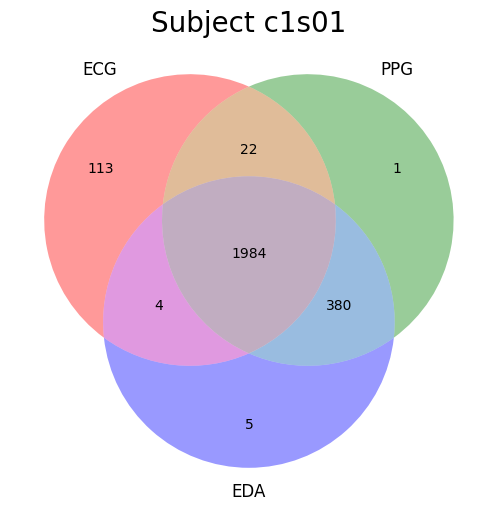

In [113]:
from matplotlib_venn import venn3_unweighted
import matplotlib.pyplot as plt

# Calculate sets
ecg_set = set(ecg_cgm_idx)
ppg_set = set(ppg_cgm_idx)
eda_set = set(eda_cgm_idx)
temp_set = set(temp_cgm_idx)

# Calculate overlaps
only_ecg = len(ecg_set - ppg_set - eda_set)
only_ppg = len(ppg_set - ecg_set - eda_set)
only_eda = len(eda_set - ecg_set - ppg_set)
ecg_and_ppg = len(ecg_set & ppg_set - eda_set)
ecg_and_eda = len(ecg_set & eda_set - ppg_set)
ppg_and_eda = len(ppg_set & eda_set - ecg_set)
all_three = len(ecg_set & ppg_set & eda_set)

# Create the Venn diagram
plt.figure(figsize=(8, 6))
venn = venn3_unweighted(
    subsets=(only_ecg, only_ppg, ecg_and_ppg, only_eda, ecg_and_eda, ppg_and_eda, all_three),
    set_labels=("ECG", "PPG", "EDA")
)

# Add title
plt.title("Subject %s" % subject_id)
# Show the plot
plt.show()


In [114]:
shared_cgm_idx = sorted(list(ecg_set & ppg_set & eda_set & temp_set))
all_cgm_idx = sorted(list(ecg_set | ppg_set | eda_set | temp_set))
corresponding_glucose_values = []
for cgm_idx in shared_cgm_idx:
    corresponding_glucose_values.append(ecg_df[ecg_df['CGM_idx'] == cgm_idx]['glucose'].values[0])

shared_cgm_idx = np.array(shared_cgm_idx)
corresponding_glucose_values = np.array(corresponding_glucose_values)
print("Number of shared CGM indices: {:d} / {:d} ({:.2f}%)".format(len(shared_cgm_idx), len(all_cgm_idx), len(shared_cgm_idx) / len(all_cgm_idx) * 100))

Number of shared CGM indices: 1984 / 2509 (79.08%)


In [115]:
hypo_indices = shared_cgm_idx[np.where(corresponding_glucose_values < 70)]
normal_indices = shared_cgm_idx[np.where((corresponding_glucose_values >= 70) & (corresponding_glucose_values <= 180))]

print("Number of hypoglycemic indices: ", len(hypo_indices))
print("Number of normal indices: ", len(normal_indices))

Number of hypoglycemic indices:  113
Number of normal indices:  1871


In [116]:
out_json_path = os.path.join(subject_dir, 'metadata.json')

if os.path.exists(out_json_path):
    print("Loading folds...")
    with open(out_json_path, 'r') as f:
        folds = json.load(f)
else:
    print("Creating folds...")
    # five fold cross validation
    np.random.seed(0)
    np.random.shuffle(hypo_indices)
    np.random.shuffle(normal_indices)

    n_folds = 5
    hypo_start = np.arange(0, len(hypo_indices), len(hypo_indices) // n_folds)
    normal_start = np.arange(0, len(normal_indices), len(normal_indices) // n_folds)

    folds = {}
    for i in range(n_folds):
        hypo_fold = hypo_indices[hypo_start[i]:hypo_start[i] + len(hypo_indices) // n_folds]
        normal_fold = normal_indices[normal_start[i]:normal_start[i] + len(normal_indices) // n_folds]
        val_fold = np.concatenate([hypo_fold, normal_fold])
        train_fold = np.concatenate([hypo_indices, normal_indices])
        train_fold = np.setdiff1d(train_fold, val_fold)
        folds[f"v{i+1}"] = {
            "train": list(train_fold),
            "val": list(val_fold)
        }

    for i, key in enumerate(folds):
        print(folds[key]['val'])
        print("Fold ", key, " Train size: ", len(folds[key]['train']), " Val size: ", len(folds[key]['val']))

    with open(out_json_path, 'w') as f:
        json.dump(folds, f, indent=4)

Loading folds...


In [117]:
# check if contain CGM index that is not in the shared CGM index
for fold in folds.values():
    for key, indices in fold.items():
        for idx in indices:
            if idx not in shared_cgm_idx:
                print(f"Error: {idx} not in shared CGM index")

## Demo Data Splitting

In [118]:
version = 'v1'
train_df = eda_df[eda_df['CGM_idx'].isin(folds[version]['train'])].copy()
val_df = eda_df[eda_df['CGM_idx'].isin(folds[version]['val'])].copy()

train_df['Date'] = train_df['Timestamp'].dt.date
val_df['Date'] = val_df['Timestamp'].dt.date

In [119]:
dates = sorted(set(list(train_df['Date'].unique()) + list(val_df['Date'].unique())))
print(len(dates))

14


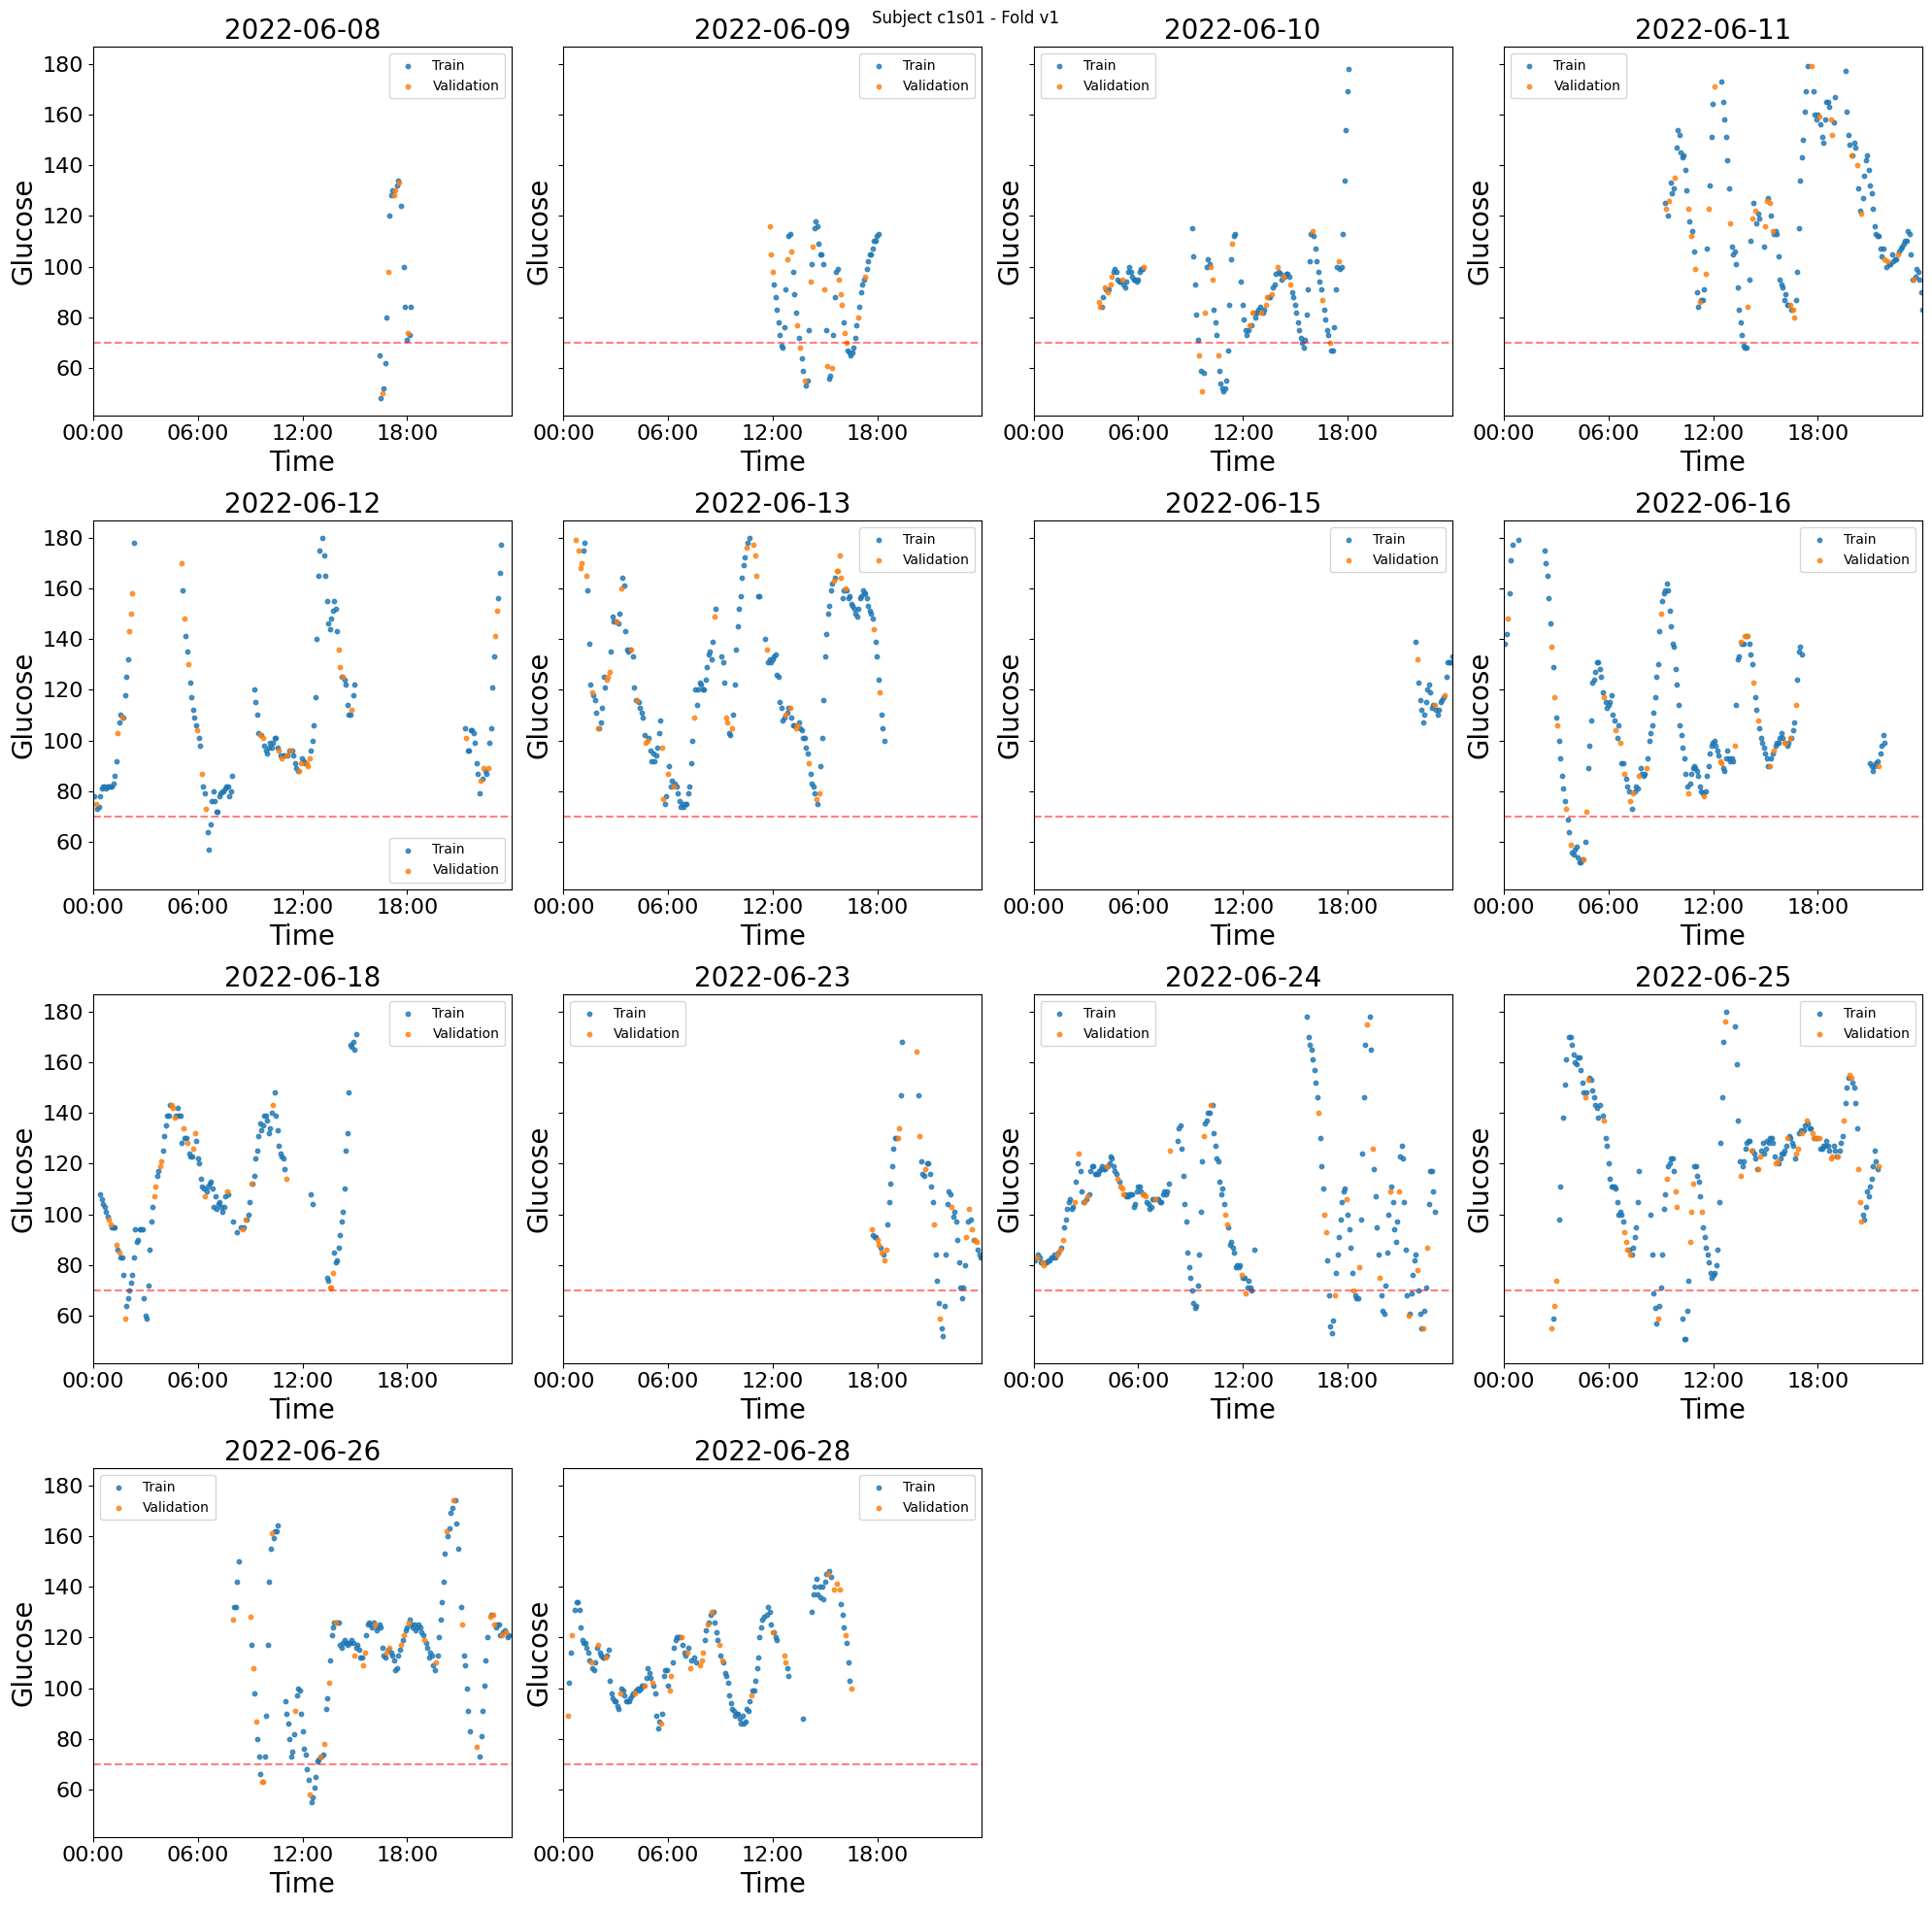

In [120]:
n_cols = 4
n_rows = len(dates) // n_cols + 1

fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows), sharey=True)
plt.rcParams.update({'xtick.labelsize': 16, 'ytick.labelsize': 16, 'axes.labelsize': 20, 'axes.titlesize': 20})

for i, date in enumerate(dates):
    ax = axs.flatten()[i]
    train_day = train_df[train_df['Date'] == date]
    val_day = val_df[val_df['Date'] == date]

    # Plot for each date
    ax.scatter(train_day['Timestamp'], train_day['glucose'], label='Train', marker='o', alpha=0.8, s=10)
    ax.scatter(val_day['Timestamp'], val_day['glucose'], label='Validation', marker='o', alpha=0.8, s=10)

    ax.set_title(date)
    ax.set_xlabel('Time')
    
    # span from 0 to 24 hours
    # Format x-axis to show time only (0:00 to 23:59)
    ax.set_xlim(pd.Timestamp(f"{date} 00:00"), pd.Timestamp(f"{date} 23:59"))

    # Format x-axis to show time only (0:00 to 23:59)
    ax.set_xticks(pd.date_range(start=f'{date} 00:00', end=f'{date} 23:59', freq='6H'))
    ax.set_xticklabels([t.strftime('%H:%M') for t in pd.date_range(start=f'{date} 00:00', end=f'{date} 23:59', freq='6H')])

    # Horizontal line for reference
    ax.hlines(y=70, xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], color='r', linestyle='--', alpha=0.5)

    ax.set_ylabel('Glucose')
    ax.legend()

# Remove unused subplots
for j in range(i + 1, len(axs.flatten())):
    fig.delaxes(axs.flatten()[j])

# Adjust layout
plt.suptitle(f'Subject {subject_id} - Fold {version}')
plt.tight_layout()
plt.show()